In [1]:
import pandas as pd
from matplotlib import pyplot as pt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn import preprocessing
%matplotlib inline

sdp: systolic blood pressure<br>
tobacco: cumulative tobacco consumption in kg<br>
ldl: low-density lipoproteian cholesterol<br>
adiposity: adipose tissue concentration<br>
famhist: family history of hearth disease (1=present, 0=abscent)<br>
typea: score on test designed to measure type-A behaviour<br>
obesity: obesity<br>
alcohol: current consumption of alcohol<br>
age: age<br>
chd: coronary heart disease at baseline (1 = yes, 0 =no) #TARGET<br>

In [2]:
data = pd.read_csv('heart.txt', sep="\t")
y = data['chd']

# Preprocessing

## Normalisation

In [3]:
data = data.drop(['chd'],axis=1)
data.famhist = [1 if x == 'Present' else 0 for x in data.famhist]
nc = data.columns.values.tolist()

x = data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

data = pd.DataFrame(x_scaled, columns=nc)

In [4]:
data.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,0.504274,0.384615,0.331010,0.457902,1.0,0.553846,0.332497,0.660371,0.755102
1,0.367521,0.000321,0.239024,0.611748,0.0,0.646154,0.444479,0.013996,0.979592
2,0.145299,0.002564,0.174216,0.714406,1.0,0.600000,0.452949,0.025885,0.632653
3,0.589744,0.240385,0.378397,0.875245,1.0,0.584615,0.542346,0.164821,0.877551
4,0.282051,0.435897,0.175610,0.588531,1.0,0.723077,0.354141,0.389565,0.693878


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 9 columns):
sbp          462 non-null float64
tobacco      462 non-null float64
ldl          462 non-null float64
adiposity    462 non-null float64
famhist      462 non-null float64
typea        462 non-null float64
obesity      462 non-null float64
alcohol      462 non-null float64
age          462 non-null float64
dtypes: float64(9)
memory usage: 32.6 KB


In [6]:
#data.famhist = [1 if x == 'Present' else 0 for x in data.famhist]

In [7]:
data.describe()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,0.319033,0.116527,0.262044,0.522146,0.415584,0.616983,0.355838,0.115799,0.567674
std,0.175182,0.147212,0.144314,0.217642,0.493357,0.151039,0.132173,0.166323,0.298142
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.196581,0.001683,0.160453,0.364615,0.000000,0.523077,0.259881,0.003465,0.326531
50%,0.282051,0.064103,0.234146,0.541958,0.000000,0.615385,0.348338,0.051022,0.612245
75%,0.401709,0.176282,0.335192,0.684965,1.000000,0.723077,0.432795,0.162324,0.816327
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


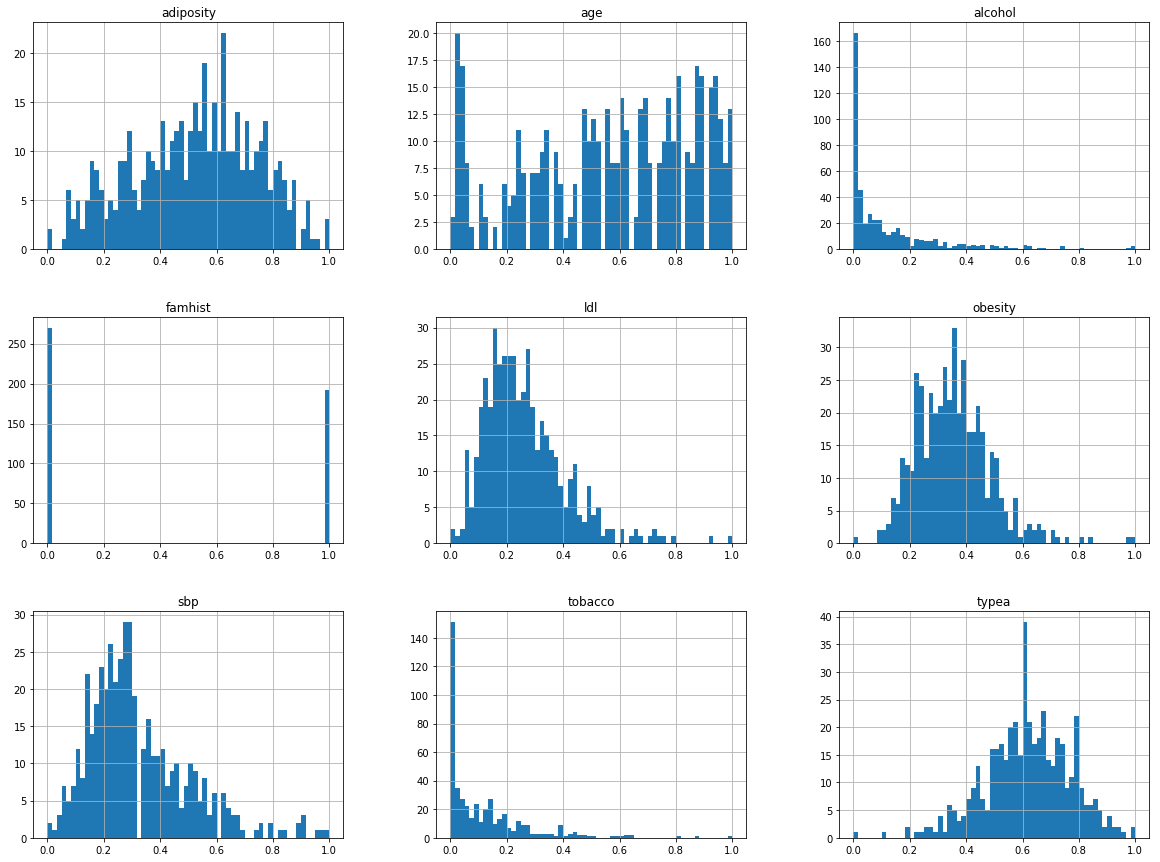

In [8]:
data.hist(bins = 60,figsize=(20,15))
pt.show()

# Create train / test set

In [10]:
X = data#.drop('chd',axis = 1)
num_of_features = X.shape[1]

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42)

# Logistic Regression

In [12]:
X_input = tf.placeholder(dtype=tf.float32,shape = [None,num_of_features],name = 'data')
y_input = tf.placeholder(dtype=tf.float32,shape = [None],name = 'target')
weights = tf.Variable(tf.random_normal(shape=[num_of_features,1]),name = 'weights')
bias = tf.Variable(0,dtype=tf.float32,name = 'bias')
#lin_regression = X_input @ weights + bias
lin_regression = tf.matmul(X_input,weights) + bias
predicted = tf.squeeze(tf.nn.sigmoid(lin_regression))#tf.squeeze(1/(1+tf.exp(-1*lin_regression)))
loss = tf.reduce_sum(tf.squared_difference(y_input,predicted))
optimiser = tf.train.GradientDescentOptimizer(1e-3).minimize(loss)

with tf.Session() as sess:
    model_variables = tf.global_variables_initializer() 
    sess.run(model_variables)
    for step in range(1000):
        sess.run(optimiser,{X_input: X_train, y_input: y_train})
        if step%10==0:
            print ("loss {}".format(sess.run(loss,{X_input: X_train, y_input: y_train})))
            print("train auc:", roc_auc_score(y_train, sess.run(predicted, {X_input: X_train})))
            print("train accuracy:", accuracy_score(y_train, sess.run(predicted, {X_input: X_train}).round()))


loss 93.36504364013672
train auc: 0.416169992226
train accuracy: 0.656069364162
loss 88.79136657714844
train auc: 0.454410839226
train accuracy: 0.635838150289
loss 85.76836395263672
train auc: 0.485543997335
train accuracy: 0.621387283237
loss 84.08906555175781
train auc: 0.503313219561
train accuracy: 0.595375722543
loss 83.0645751953125
train auc: 0.517195424425
train accuracy: 0.595375722543
loss 82.28374481201172
train auc: 0.525487728131
train accuracy: 0.601156069364
loss 81.59366607666016
train auc: 0.532040128827
train accuracy: 0.595375722543
loss 80.94760131835938
train auc: 0.538037241328
train accuracy: 0.598265895954
loss 80.33191680908203
train auc: 0.544737718876
train accuracy: 0.595375722543
loss 79.74208068847656
train auc: 0.551068004294
train accuracy: 0.598265895954
loss 79.17610168457031
train auc: 0.55725021286
train accuracy: 0.606936416185
loss 78.63263702392578
train auc: 0.563876651982
train accuracy: 0.606936416185
loss 78.11067199707031
train auc: 0.570466